<a href="https://colab.research.google.com/github/Jayveersinh-Raj/LargerData_NeuralNets_Regression/blob/main/Larger_Data_Neural_Networks_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A larger example
In practice we would probably deal with complex dataset

📑 **kaggle** is the best place for the datasets, and data science and ML in general

In the model we are building below, they used **linear regession**. But, since we are learning **deep learning** we'll use **Neural Networks Regression**

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Independent variables or features -> Everything except the charges
# Our dependent variable or label (which we will predict) -> charges
# There are some fields with non-numerical data, we need to numerically encode it

# We will use One-hot encoding, we cannpt encode each individually
# We will use pandas for that
insurance_encoded = pd.get_dummies(insurance) # It just directly one hot encodes the non numerical data for us
insurance_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Now, we will create X and y values (features and labels)
X = insurance_encoded.drop("charges", axis = 1)
y = insurance_encoded["charges"]
# We do not need just the charges from the table because it would be our y
# axis = 1, since it is a 2D matrix/tabel, and remember, column is the 2nd element inside shape(), 
# meaning column index is 1, and charges is a column

# Lets check X
X # X.head() gives first 5 rows, same for y.head() too or head() in general

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# Now lets check y
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Create training and test sets using sklearn because it is huge data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 0.2 means 20% training data
len(X), len(X_train), len(X_test)

# 268 test samples, nearly 20% of the total 0.2*1338
# random_state = 42 gives pseudo random rows, meaning everytime you use thi number X_train would have same datasets, useful to tune

(1338, 1070, 268)

In [ ]:
# Lets see our X_train now
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
# Now, preprocessing is done, now we can build a model (similar to our model_best from neural_network_regression_tensorflow)
# Remember, build a simple model first with one/two layer then gradually train it
# Create the random seed for redproducibility
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, activation = None, input_shape = [11], name = "input_layer"), # input_shape = [11] because we have 11 columns in X
     tf.keras.layers.Dense(1, activation = None, name = "output_layer")
], name = "model_1") # Lets create it similar to previous aforementioned notebook model_best

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# Fitting 
model.fit(X_train, y_train, epochs = 100, verbose = 0)


In [ ]:
# Lets now see the summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                120       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


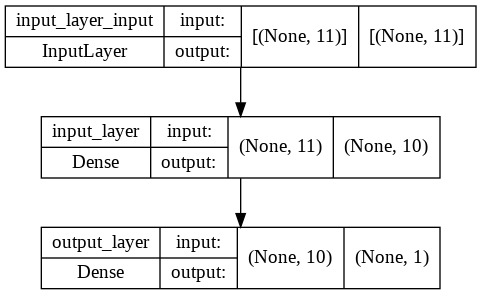

In [ ]:
# Now lets visualize it
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

In [ ]:
# Now, lets predict
y_pred = model.predict(X_test)
y_pred

array([[12541.166 ],
       [ 8981.749 ],
       [20281.945 ],
       [12997.792 ],
       [ 7667.256 ],
       [ 9048.03  ],
       [ 3970.31  ],
       [16986.562 ],
       [ 6553.7   ],
       [13931.824 ],
       [11841.377 ],
       [11257.752 ],
       [ 7640.4194],
       [17186.02  ],
       [19633.303 ],
       [16880.6   ],
       [14148.9795],
       [16439.781 ],
       [12374.691 ],
       [14375.43  ],
       [ 7863.217 ],
       [11745.962 ],
       [ 3963.8625],
       [ 5556.0513],
       [14307.78  ],
       [14338.122 ],
       [15751.809 ],
       [ 7908.605 ],
       [13147.357 ],
       [ 3969.0344],
       [11877.595 ],
       [14943.573 ],
       [ 5069.9224],
       [ 8432.175 ],
       [ 6402.6353],
       [11912.932 ],
       [ 4998.167 ],
       [11293.194 ],
       [17304.564 ],
       [13189.915 ],
       [ 6431.8228],
       [ 5454.861 ],
       [15130.4   ],
       [15198.897 ],
       [ 9324.264 ],
       [15607.694 ],
       [ 5837.816 ],
       [ 7023

In [ ]:
# Lets Evaluate
model.evaluate(X_test, y_test) # Evaluate to compare with our test samples

#mae is very very high, 7000 we'll have to tune it

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

🔑 We did not need to convert them to tensors or do something, because pandas is build upon numpy, and as we have seen earlier tensorflow code has no problem working with numpy arrays.

In [ ]:
# Lets check how significant is 7023 which got as mae after evaluation
y_train.median(), y_train.mean() # We are checking mean and median because mae is just error on average

(9575.4421, 13346.089736364489)

**OMG** 7000 off on average is quite signficant looking at nearly 13000 mean and around 9000 median.

We definitely want/have to improve it



In [ ]:
# Lets try and improve it by tuning hyperparameters
# Lets build the model again
tf.random.set_seed(42)
# 1. Create the model
model_2 = tf.keras.Sequential([
    #  tf.keras.layers.Dense(100, activation = None),
      tf.keras.layers.Dense(10, activation = None),
      tf.keras.layers.Dense(1, activation = None)
])

# Compile it using Adam optimizer
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                metrics = ["mae"])

# Fitting
history = model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 10879.9834 - mae: 10879.9834
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7538.6685 - mae: 7538.6685
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7259.3555 - mae: 7259.3555
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7008.2295 - mae: 7008.2295
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 6763.3223 - mae: 6763.3223
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 6511.8413 - mae: 6511.8413
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 6388.1392 - mae: 6388.1392
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6220.3125 - mae: 6220.3125
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6085.1406 - mae: 6085.1406
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 5924.1436 - mae: 5924.14

In [ ]:
# Lets Evaluate
model_2.evaluate(X_test, y_test) #comparison of the test data

9/9 [==============================] - 0s 6ms/step - loss: 3186.8457 - mae: 3186.8457


[3186.845703125, 3186.845703125]

Text(0.5, 0, 'epochs')

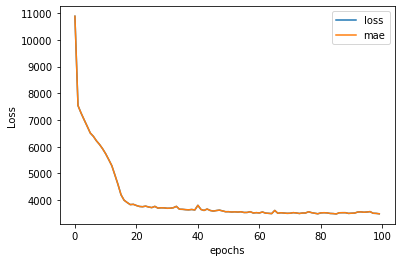

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

🤔 How long should train it for?

A lot of people had same questions, it actually depends on the problem one is working on. 

But tensorflow has introduced a feature because of this called **early stopping callback**, which is a TensorFlow component you can add to your model, once it stops improving a certain metric

# Preprocessing data (normalization and standardization)
* Normalization is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. It is not necessary for all datasets in a model. It is required only when features of machine learning models have different ranges.

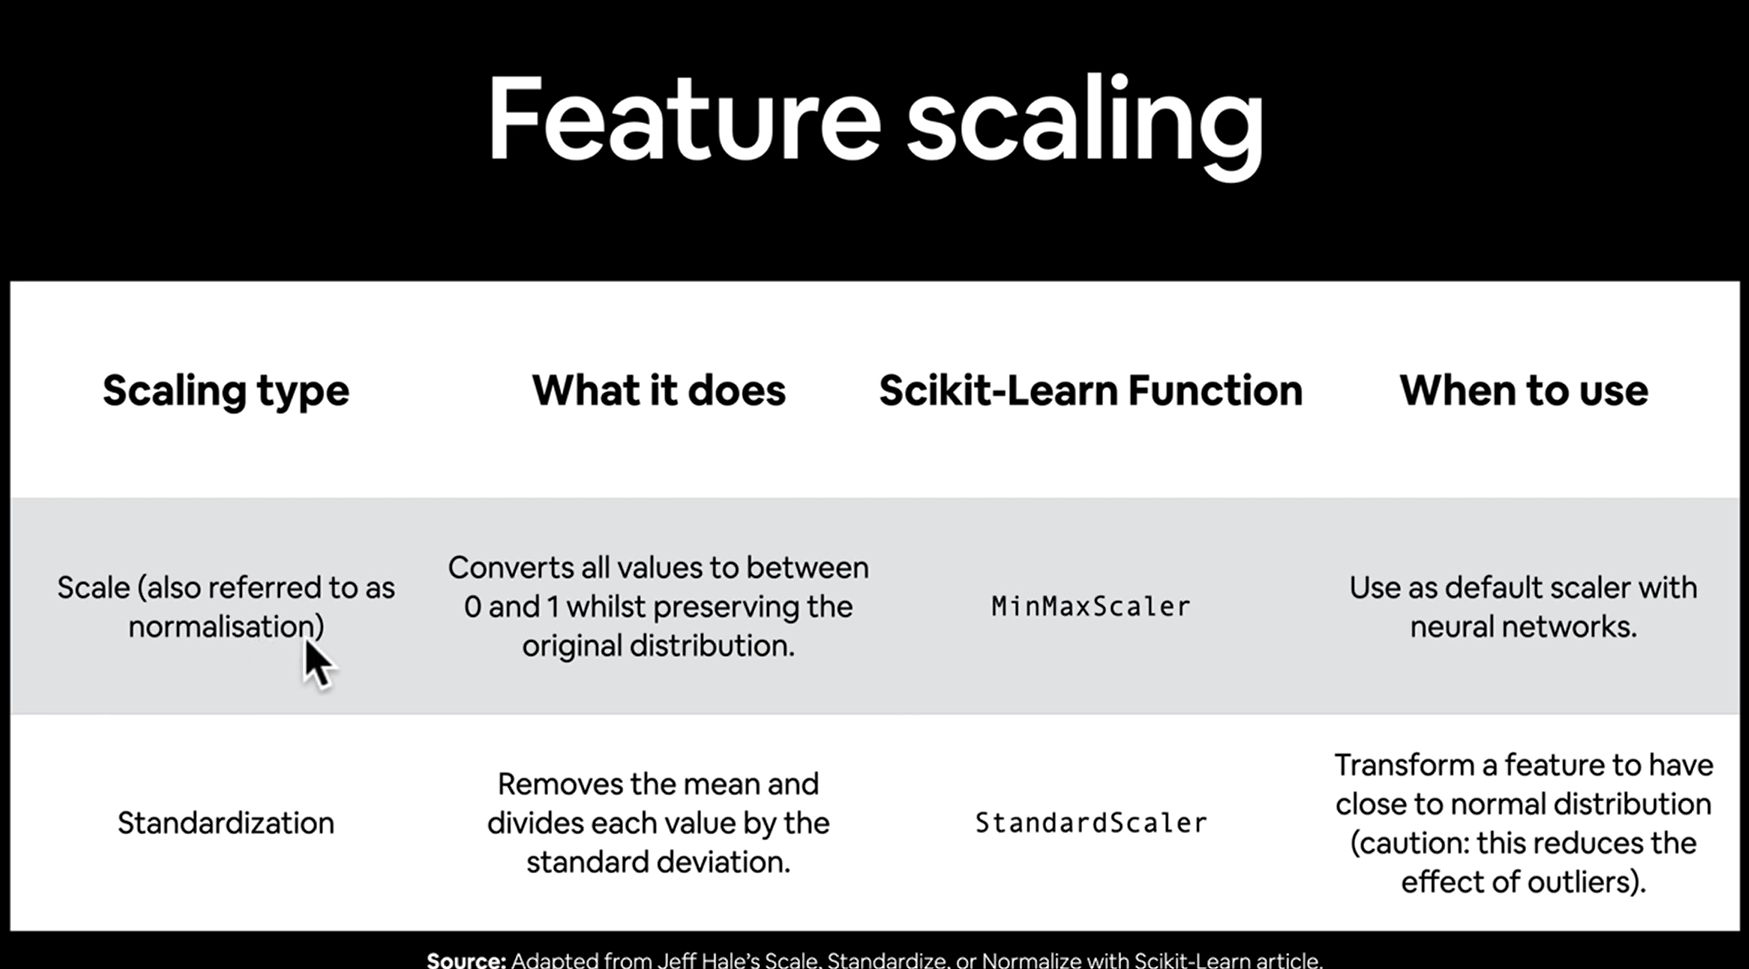

🔑 In temrs of scalibg values, neural networks prefers normalization
* If confused, then use both, and see which one performs better

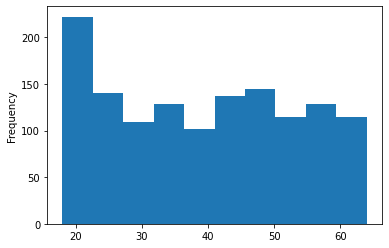

In [ ]:
# Lets see and visualize through histogram, our different data ranges in X
# lets plot age first
X["age"].plot(kind = "hist")

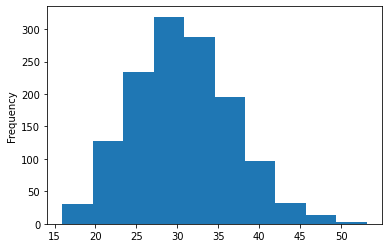

In [ ]:
# Lets see bmi data points by plotting
X["bmi"].plot(kind = "hist")

In [ ]:
# Lets count specific no. of children how many parents have
X["children"].value_counts() # Some with 0 childrens to 18 parents with 5 children

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In short, all the data has different ranges. Normalization as we know it, would scale every data to between 0 and 1.

In [ ]:
# Lets begin to build again
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Sckit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns b/w 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"]) # We are going to ignore unknowns
)

# Now lets get our features into X, which is everything except the label i.e. charges
X = insurance.drop("charges", axis = 1) # remember charges is a column, hence axis = 1 or the 2nd index/dimension inside of shape()
y = insurance["charges"]

# Build our train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # random_state(42) will divide it same as last time

# Fit the column transformer to our training data only
ct.fit(X_train)

# Transform training and test data with normalization (MinMAxScalar) and OneHitEncoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) 

In [ ]:
# Now lets see how it looks now
X_train_normal[0] # Just the first one to see

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# We got everythings between 0 and 1
# lets check the shape
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Because of one hot encoding it gave extra columns thus get got from 6 to 11

Now since it is normalized and one hot encoded, lets build a neural network to train on this data

Preprocessed steps:
1. Reading from CSV using pandas
2. Getting them into X_train and y_train accordingly
3. One-Hot encoding (using transformer) using sklearn
4. Splitting in test and train set using sklearn
5. Normalising X_train using .transformer(X_train)

**Note:** We do not normalize y_train since it is just single column meaning there is only single range of them

In [ ]:
# Now since our preprocessing is over
# Lets build the model
# Random seed
tf.random.set_seed(42)

# 1. create the model
model_normal = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation = None),
            tf.keras.layers.Dense(1, activation = None)
])

# Compile the model
model_normal.compile(loss = tf.keras.losses.mae,
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics = ["mae"])

# Fiting
history = model_normal.fit(X_train_normal, y_train, epochs = 100, verbose = 0)

In [ ]:
# Lets evaluate and check
model_normal.evaluate(X_train_normal, y_train)

34/34 [==============================] - 0s 3ms/step - loss: 3477.5781 - mae: 3477.5781


[3477.578125, 3477.578125]

Text(0, 0.5, 'epochs')

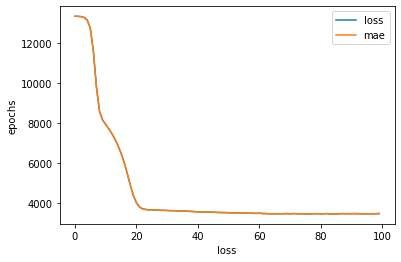

In [ ]:
# Lets plot and check the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

In [ ]:
# Lets try adam now
tf.random.set_seed(42)

# 1. Build the model
model_normal2 = tf.keras.Sequential([
              tf.keras.layers.Dense(10, activation = None),
              tf.keras.layers.Dense(1, activation = None)
])

# 2. Compile
model_normal2.compile(loss = tf.keras.losses.mae,
                      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                      metrics = ["mae"])

# 3. Fitting
model_normal2.fit(X_train_normal, y_train, epochs = 100, verbose = 0)


In [ ]:
# Lets evaluate
model_normal2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3163.0986 - mae: 3163.0986


[3163.0986328125, 3163.0986328125]

Well this is not much different then  what we have as our best model without normalization. But, maybe in future when we have even larger dataset, maybe normalization would help

🔑 **Normalization helps in faster convergence, meaning, we can get better results in less time and less epochs. Normalization although does  not guarantee imporved results**

🔑**Sometimes what and how data you give in preprocessing also effects on the results**